# Project Update: Analysis of YouTube Trending Video Data

#### Group 1 Terp Analytica: Akshay Havalgi, Austin Hom, Bekzod Akramov, Shashank Manu Rao, Vivek Ramanathan


In this document, we will provide a brief overview of the project, summarize our progress to date, and provide codes we have used in cleaning, preparing, visualizing and analyzing the data. 


### Section 1: Project Overview (Markdown)

In today's age, where most people have access to a variety of electronic devices, more and more people are consuming content using online video services, among which YouTube is the most popular. According to Google, which owns YouTube, over 400 hours of video are uploaded every minute, 100s of millions of hours are watched each day, and billions of users visit YouTube each month. Thus, YouTube provides something of interest for creators, viewers, and advertisers. YouTube videos are monetized through ad revenues, so the more views a video receives, the more ad revenue that can be generated. From the advertiser's point of view, they want to market their product to as wide an audience as possible, so they will want their ads on the most popular videos. Moreover, currently COVID-19 has caused large numbers of people to stay at home, which will undoubtedly cause a spike in the number of daily YouTube visitors.    

In our project, we are analyzing data on daily trending YouTube videos. Given YouTube’s large library of videos, it is important to filter videos to different users. YouTube uses a combination of different factors including measuring users interactions (number of views, shares, comments and likes) to determine if a video is trending. These trending videos are then made visible to users so they can see which videos are popular at a given moment. We are looking at what factors make a video become trending and if these factors are different across various countries and categories. We are also exploring why certain videos generate more views, likes and comments. 

Some of the research questions we are looking at are: 
- What are common factors among trending videos? 
- What differences are there between trending videos in different regions (ex between United States, Great Britain and India)?
- Are there factors that are generalizable across regions?
- Do videos with more likes or more comments get more views?
- Can we categorize the videos based on comments and other engagement metrics? 
- What are the most popular categories among trending videos?
- On a given trending day, would there be more dislikes than likes for any video in general?
- What time of the day would be the ideal to publish a video to become viral?
- Can we make any inferences about viewer preferences based on the analysis of the video data?
- What are the implications for advertising and monetization?



### Section 2: Milestones and Progress (Markdown)

To date, we have been able to accomplish most of the milestones we had planned on. We have been doing our best to mitigate the issues caused by COVID-19 and are using online tools to collaborate as efficiently as possible. For the most part, we are on track to accomplish our plans, as can be seen in the table below. We are slightly behind on text processing, which we are about to start soon.

[Insert Milestone table here]



### Section 3: Data Acquisition and Cleaning Code (Markdown + Code)

We obtained the dataset from Kaggle. The dataset is a result of scraping the most relevant information from videos that are currently trending on YouTube in a specified set of countries.This dataset includes several months of data on daily trending YouTube videos for USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan and India regions, with up to 200 listed trending videos per day. There is a separate dataset for each country. 

Data includes the following variables/columns: category, video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. The category variable varies between regions, and we will find categories for a specific video in its associated JSON. One such file is included for each of the ten regions in the dataset. There is a column metadata for this dataset which provides more specific information about its contents.

We have completed the following tasks to prepare the data for visualization and analyses over the past month:

- Choosing valid data for analysis - videos currently trending on YouTube. Multiple datasets pertaining to different regions are imported from Kaggle.
- Importing and Merging data - Datasets of various regions are imported into python and joins are created to merge the csv and json files.
- Data Cleaning - Check for missing values and duplicate data in our updated dataset
- Data Transformation - Impute missing values, rename columns, change data types
- Feature Extraction - adding relevant columns for analysis such as like/dislike ratio, difference in publish time vs trending time, and year video published/trending
- Indexing, selection, and filtering - subsetting required data for analysis such as only videos in the music category



In [1]:
import pandas as pd #load all required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt 

In [2]:
youtubeUS = pd.read_csv(r"C:\Users\Bekzod Akramov\Desktop\UMD BS Courses\SPRING 2019\BUDT758X\Project\youtube-new\USvideos.csv") #load US data using raw string

In [3]:
youtubeUS.shape #check dataframe dimensions

(40949, 16)

In [4]:
youtubeGB = pd.read_csv(r"C:\Users\Bekzod Akramov\Desktop\UMD BS Courses\SPRING 2019\BUDT758X\Project\youtube-new\GBvideos.csv") #load Great Britain youtube data 

In [5]:
youtubeGB.shape #check dataframe dimensions

(38916, 16)

In [6]:
youtubeIN = pd.read_csv(r"C:\Users\Bekzod Akramov\Desktop\UMD BS Courses\SPRING 2019\BUDT758X\Project\youtube-new\INvideos.csv") #load India youtube data 

In [7]:
youtubeIN.shape #check dataframe dimensions

(37352, 16)

In [8]:
youtubeIN.head(10) #check dataframe column values to get a feel of data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...


In [424]:
youtubeIN.describe() #summary statistics

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [10]:
us_json = pd.read_json(r"C:\Users\Bekzod Akramov\Desktop\UMD BS Courses\SPRING 2019\BUDT758X\Project\youtube-new\US_category_id.json")

In [11]:
us_json.head(10) #loading json files

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [12]:
us_json.describe()

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
freq,32,32,1


In [13]:
us_json.dtypes

kind     object
etag     object
items    object
dtype: object

In [14]:
in_json = pd.read_json(r"C:\Users\Bekzod Akramov\Desktop\UMD BS Courses\SPRING 2019\BUDT758X\Project\youtube-new\IN_category_id.json")

In [15]:
in_json.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
freq,31,31,1


In [16]:
gb_json = pd.read_json(r"C:\Users\Bekzod Akramov\Desktop\UMD BS Courses\SPRING 2019\BUDT758X\Project\youtube-new\GB_category_id.json")

In [17]:
gb_json.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
freq,31,31,1


In [18]:
youtubeUS.insert(0,"Country","US", True)
youtubeGB.insert(0,"Country","GB", True) #insert country column with country code
youtubeIN.insert(0,"Country","IN", True)
youtubeIN.head(10)

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,IN,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,IN,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,IN,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,IN,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,IN,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
5,IN,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
6,IN,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
7,IN,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...
8,IN,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...
9,IN,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...


In [19]:
youtubeUSGBIN = pd.concat([youtubeUS, youtubeGB, youtubeIN]) #concat all three dataframes

In [20]:
youtubeUSGBIN.describe() #summary statistisc

,category_id,views,likes,dislikes,comment_count
count,117217.000000,1.172170e+05,1.172170e+05,1.172170e+05,1.172170e+05
mean,19.439638,3.125416e+06,7.923513e+04,4.354511e+03,8.149208e+03
std,7.581672,1.209701e+07,2.527158e+05,3.528140e+04,3.781326e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,1.819770e+05,2.544000e+03,1.600000e+02,2.990000e+02
50%,24.000000,5.605360e+05,1.222400e+04,5.440000e+02,1.255000e+03
75%,24.000000,1.811610e+06,5.198400e+04,1.913000e+03,4.738000e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [436]:
youtubeUSGBIN.tail(10) #peep into the data

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
37342,IN,aVHqWcTsgxc,18.14.06,भय्यू महाराजांची सुसाईड नोट सापडली,ZEE 24 TAAS,25,2018-06-12T10:27:38.000Z,"zee24taas|""marathi video""|""marathi news""|""Brea...",339265,434,185,73,https://i.ytimg.com/vi/aVHqWcTsgxc/default.jpg,False,False,False,Bhaiyyuji Maharaj | Suicide For Depression And...
37343,IN,zIvfX9vc0Nw,18.14.06,THINGS GUJARATIS ARE TIRED OF HEARING FT. Tath...,Hasley India,23,2018-06-11T13:17:24.000Z,"hasley|""india""|""harsh""|""beniwal""|""rishhsome""|""...",447755,23896,1304,1340,https://i.ytimg.com/vi/zIvfX9vc0Nw/default.jpg,False,False,False,So we are back with a new comedy sketch on our...
37344,IN,5gd1G0aeqtw,18.14.06,If everything on the internet was true | Comed...,Dreamz Unlimited,24,2018-06-13T15:33:32.000Z,"nagaland|""northeast""|""facebook""|""whatsapp""|""so...",56313,6687,57,556,https://i.ytimg.com/vi/5gd1G0aeqtw/default.jpg,False,False,False,Believing everything you see and hear on the i...
37345,IN,tR5FZC2FP-U,18.14.06,"Priyamanaval Episode 1040, 13/06/18",VikatanTV,43,2018-06-13T17:00:04.000Z,"priyamanaval episode 1040|""Priyamanaval 13.06....",535254,3105,1403,898,https://i.ytimg.com/vi/tR5FZC2FP-U/default.jpg,False,False,False,Priyamanaval Episode 1040Subscribe: https://go...
37346,IN,8aMckaI9k00,18.14.06,Indore Preview- Chacha Vidhayak Hai Humare - Z...,Zakir Khan,22,2018-06-13T14:18:31.000Z,[none],274861,16448,183,834,https://i.ytimg.com/vi/8aMckaI9k00/default.jpg,False,False,False,"Suno, Sab sort karva denge. Chacha vidhayak ha..."
37347,IN,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,IN,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,IN,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,IN,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...
37351,IN,wERgpPK44w0,18.14.06,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,2018-06-10T04:29:54.000Z,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...


In [21]:
youtubeUSGBIN.shape #shape of master dataframe

(117217, 17)

In [22]:
youtubeUSGBIN.dtypes #data types of cols

Country                   object
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [23]:
youtubeUSGBIN.isnull().any() #description col has some nulls

Country                   False
video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [24]:
youtubeUSGBIN.isna().sum() #count of nulls

Country                      0
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1743
dtype: int64

In [25]:
df=youtubeUSGBIN.sample(frac=1).reset_index(drop=True) # shuffle the df for mixed country data and drop original index 
df.head(10) 

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,IN,DoBtC-XknLU,18.13.06,Pyaar Lafzon Mein Kahan Episode 69,Pyaar Lafzon Mein Kahan,1,2018-06-11T13:42:45.000Z,"filmazia|""pyar lafzon mein kahan""|""pakistan""|""...",1611556,20516,898,3633,https://i.ytimg.com/vi/DoBtC-XknLU/default.jpg,False,False,False,Subscribe → http://bit.ly/PyaarLafzonMeinKahan...
1,GB,29FW8nTF0Ww,17.07.12,OB64 NEW CARD SYSTEM | IS IT PAY2WIN?!,KamiVS,20,2017-11-30T09:48:39.000Z,"ob64|""new card system""|""pay2win""|""paladins ob6...",45248,1862,80,1102,https://i.ytimg.com/vi/29FW8nTF0Ww/default.jpg,False,False,False,We dive into this new card system Hi-Rez has i...
2,IN,ql-WQp-jKp0,18.29.05,കഴിഞ്ഞ വർഷത്തെ ഏഷ്യാനെറ്റ് ഫിലിം അവാർഡ്‌സിലെ ബ...,Asianet,24,2018-05-28T06:16:11.000Z,"AFA|""film awards""|""filmawards""|""asianetawards""...",293112,1678,164,57,https://i.ytimg.com/vi/ql-WQp-jKp0/default.jpg,False,False,False,കഴിഞ്ഞ വർഷത്തെ ഏഷ്യാനെറ്റ് ഫിലിം അവാർഡ്‌സിലെ ബ...
3,US,xe5tXZs-iWw,18.30.04,Pressing Non-Newtonian Fluid Through Small Hol...,Hydraulic Press Channel,28,2018-04-28T14:44:26.000Z,"Hydraulic press channel|""hydraulicpresschannel...",668064,16873,508,2270,https://i.ytimg.com/vi/xe5tXZs-iWw/default.jpg,False,False,False,In this video we test what will happen when y...
4,US,i0p1bmr0EmE,18.22.04,TWICE What is Love? M/V,jypentertainment,10,2018-04-09T08:59:51.000Z,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",59326481,1269261,112989,230471,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...
5,IN,OlVG0U6iZEs,18.26.01,Raja Rani 25/01/2018 | TODAY FULL EPISODE | VI...,Tamil Speedy,22,2018-01-25T13:33:40.000Z,"Raja Rani|""raja rani serial 25/01/2018""|""raja ...",446291,1386,337,69,https://i.ytimg.com/vi/OlVG0U6iZEs/default.jpg,False,False,False,SUBSCRIBE HERE FOR MORE VIDEOS - https://goo....
6,GB,305ryPvU6A8,18.23.03,HomePod — Welcome Home by Spike Jonze — Apple,Apple,28,2018-03-06T05:00:32.000Z,"anderson paak|""apartment""|""apple""|""apple music...",7615569,102146,18172,0,https://i.ytimg.com/vi/305ryPvU6A8/default.jpg,True,False,False,HomePod. The new sound of home. Directed by Sp...
7,IN,YQCywLrgXH0,18.01.04,రంగస్థలం మొదటి రోజు కలెక్షన్స్...షాక్ లో పవన్ ...,Tollywood Nagar,24,2018-03-30T12:07:07.000Z,రంగస్థలం మొదటి రోజు కలెక్షన్స్...షాక్ లో పవన్|...,179932,1978,233,0,https://i.ytimg.com/vi/YQCywLrgXH0/default.jpg,True,False,False,రంగస్థలం మొదటి రోజు కలెక్షన్స్...షాక్ లో పవన్....
8,GB,0gv90B5DIPo,17.27.12,George Lucas Being Blamed for The Last Jedi Ba...,Hybrid Network,24,2017-12-22T22:20:03.000Z,"Hybrid Network|""the last jedi""|""star wars the ...",69054,1119,183,1215,https://i.ytimg.com/vi/0gv90B5DIPo/default.jpg,False,False,False,The fans have now turned on Star Wars creator ...
9,GB,NooW_RbfdWI,18.03.03,Jurassic World: Fallen Kingdom - Official Trai...,Universal Pictures,24,2018-02-04T23:28:16.000Z,"Jurassic World|""Fallen Kingdom""|""Dinosaur""|""T-...",23759046,271406,7662,21384,https://i.ytimg.com/vi/NooW_RbfdWI/default.jpg,False,False,False,Jurassic World: Fallen Kingdom \nIn Theaters J...


In [442]:
df["trending_date"] #col to clean to transform

0         18.15.01
1         18.31.05
2         18.21.04
3         18.18.01
4         17.14.11
            ...   
117212    18.10.02
117213    17.23.12
117214    18.23.01
117215    18.08.01
117216    18.25.01
Name: trending_date, Length: 117217, dtype: object

In [443]:
df["trending_date"].apply(type).value_counts() #see col type : is a string

<class 'str'>    117217
Name: trending_date, dtype: int64

In [444]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format = "%y.%d.%m") #convert to date time object with proper format
df["trending_date"]

0        2018-01-15
1        2018-05-31
2        2018-04-21
3        2018-01-18
4        2017-11-14
            ...    
117212   2018-02-10
117213   2017-12-23
117214   2018-01-23
117215   2018-01-08
117216   2018-01-25
Name: trending_date, Length: 117217, dtype: datetime64[ns]

In [445]:
df["publish_time"] #col to clean and trasnform

0         2018-01-12T08:13:04.000Z
1         2018-05-02T16:02:50.000Z
2         2018-04-20T16:13:58.000Z
3         2018-01-11T23:21:30.000Z
4         2017-11-13T11:30:01.000Z
                    ...           
117212    2018-02-08T22:23:43.000Z
117213    2017-12-11T15:00:08.000Z
117214    2018-01-22T08:05:01.000Z
117215    2011-08-19T05:43:51.000Z
117216    2018-01-17T15:00:04.000Z
Name: publish_time, Length: 117217, dtype: object

In [446]:
df["publish_time"].apply(type).value_counts() #see col type : is a string

<class 'str'>    117217
Name: publish_time, dtype: int64

In [447]:
df["publish_time"] = df["publish_time"].str.replace("\.\d+Z\Z","") #remove micro seconds and unwanted Z at end
df["publish_time"]

0         2018-01-12T08:13:04
1         2018-05-02T16:02:50
2         2018-04-20T16:13:58
3         2018-01-11T23:21:30
4         2017-11-13T11:30:01
                 ...         
117212    2018-02-08T22:23:43
117213    2017-12-11T15:00:08
117214    2018-01-22T08:05:01
117215    2011-08-19T05:43:51
117216    2018-01-17T15:00:04
Name: publish_time, Length: 117217, dtype: object

In [448]:
df["publish_date"] = df["publish_time"].str.split("T").str[0] #split on 'T' and form two seperate columns -date & time
df["publish_time"] = df["publish_time"].str.split("T").str[1]
df

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
0,IN,Q0w-uhg-5Yg,2018-01-15,NBK's Jai Simha Movie Public Talk | Public RE...,Dabba Guru,24,08:13:04,"Trending|""Topics""|""2017""|""NBK's Jai Simha Movi...",625493,3240,1812,509,https://i.ytimg.com/vi/Q0w-uhg-5Yg/default.jpg,False,False,False,For More Latest Celebrity Updates and News Sub...,2018-01-12
1,GB,EbSOKsFHwU8,2018-05-31,Charlie Puth - Done For Me (Jazz Version),Charlie Puth,10,16:02:50,"Charlie|""Puth""|""charlie puth""|""Charlie Puth - ...",2980424,164186,1444,7451,https://i.ytimg.com/vi/EbSOKsFHwU8/default.jpg,False,False,False,Download & Stream Done For Me (feat. Kehlani):...,2018-05-02
2,IN,_PSVI84Q_WY,2018-04-21,Pawan Kalyan Gives 1 Day Ultimatum To Respond ...,V6 News Telugu,25,16:13:58,"Pawan Kalyan|""Pawan Kalyan Protest""|""Pawan Kal...",290738,1902,271,583,https://i.ytimg.com/vi/_PSVI84Q_WY/default.jpg,False,False,False,Pawan Kalyan Gives 1 Day Ultimatum To Respond ...,2018-04-20
3,US,VNigGwmovdA,2018-01-18,Walmart is closing Sam's Club stores,CNNMoney,25,23:21:30,"CNNMoney|""News""|""walmart""|""sam's club""|""stores...",218907,1054,556,1017,https://i.ytimg.com/vi/VNigGwmovdA/default.jpg,False,False,False,"Sam's Club, the buy-in-bulk store owned by Wal...",2018-01-11
4,IN,t7I8EBOTx8Y,2017-11-14,Kannil Kannonnu song from Chemparathippoo | Vi...,Manorama Music Songs,10,11:30:01,"Askar Ali|""Aju Vargheese""|""Sudheer Karamana""|""...",37786,1102,28,54,https://i.ytimg.com/vi/t7I8EBOTx8Y/default.jpg,False,False,False,Lyrics : Jinil Jose\nMusic : Rakesh A R\nSinge...,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117212,IN,47iYbraZ2bE,2018-02-10,Phulpakhru - फुलपाखरु - Episode 234 - Februar...,Zee Yuva,24,22:23:43,"Zee Yuva|""Phulpakhru""|""full episode""|""Marathi""...",99286,436,35,99,https://i.ytimg.com/vi/47iYbraZ2bE/default.jpg,False,False,False,http://www.ozee.com/shows/phulpakhru - Click h...,2018-02-08
117213,GB,MVyJZfFH9GI,2017-12-23,The Adventures of Kesha & Macklemore,kesha,10,15:00:08,[none],24564,1609,22,139,https://i.ytimg.com/vi/MVyJZfFH9GI/default.jpg,False,False,False,Get in line for the Adventures of Kesha & Mack...,2017-12-11
117214,IN,naodbT3KsO0,2018-01-23,రాకేష్ మాస్ట‌ర్ పై శేఖ‌ర్ మాస్ట‌ర్ సంచ‌ల‌న వ్...,OmFut,24,08:05:01,"Sekhar Master Comments On Rakesh Master|""sekha...",100046,220,187,33,https://i.ytimg.com/vi/naodbT3KsO0/default.jpg,False,False,False,రాకేష్ మాస్ట‌ర్ పై శేఖ‌ర్ మాస్ట‌ర్ సంచ‌ల‌న వ్...,2018-01-22
117215,US,tjwWaUs_OmM,2018-01-08,SF Museum Groundbreaking Show Survival Researc...,Genuine Survival Research Labs,28,05:43:51,"art|""history""|""violent""|""machines""|""SRL""|""Surv...",19006,92,6,19,https://i.ytimg.com/vi/tjwWaUs_OmM/default.jpg,False,False,False,SRL performed at the groundbreaking ceremony f...,2011-08-19


In [449]:
df["publish_date"] #col to convert to date

0         2018-01-12
1         2018-05-02
2         2018-04-20
3         2018-01-11
4         2017-11-13
             ...    
117212    2018-02-08
117213    2017-12-11
117214    2018-01-22
117215    2011-08-19
117216    2018-01-17
Name: publish_date, Length: 117217, dtype: object

In [450]:
df["publish_date"].apply(type).value_counts() #col is a string 

<class 'str'>    117217
Name: publish_date, dtype: int64

In [451]:
df["publish_date"] = pd.to_datetime(df["publish_date"], format = "%Y.%m.%d") #convert to date time object with proper format
df["publish_date"]

0        2018-01-12
1        2018-05-02
2        2018-04-20
3        2018-01-11
4        2017-11-13
            ...    
117212   2018-02-08
117213   2017-12-11
117214   2018-01-22
117215   2011-08-19
117216   2018-01-17
Name: publish_date, Length: 117217, dtype: datetime64[ns]

In [452]:
df["time_to_trend"] = df["trending_date"]-df["publish_date"] #time to trend for a video  - timedelta object
df

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,time_to_trend
0,IN,Q0w-uhg-5Yg,2018-01-15,NBK's Jai Simha Movie Public Talk | Public RE...,Dabba Guru,24,08:13:04,"Trending|""Topics""|""2017""|""NBK's Jai Simha Movi...",625493,3240,1812,509,https://i.ytimg.com/vi/Q0w-uhg-5Yg/default.jpg,False,False,False,For More Latest Celebrity Updates and News Sub...,2018-01-12,3 days
1,GB,EbSOKsFHwU8,2018-05-31,Charlie Puth - Done For Me (Jazz Version),Charlie Puth,10,16:02:50,"Charlie|""Puth""|""charlie puth""|""Charlie Puth - ...",2980424,164186,1444,7451,https://i.ytimg.com/vi/EbSOKsFHwU8/default.jpg,False,False,False,Download & Stream Done For Me (feat. Kehlani):...,2018-05-02,29 days
2,IN,_PSVI84Q_WY,2018-04-21,Pawan Kalyan Gives 1 Day Ultimatum To Respond ...,V6 News Telugu,25,16:13:58,"Pawan Kalyan|""Pawan Kalyan Protest""|""Pawan Kal...",290738,1902,271,583,https://i.ytimg.com/vi/_PSVI84Q_WY/default.jpg,False,False,False,Pawan Kalyan Gives 1 Day Ultimatum To Respond ...,2018-04-20,1 days
3,US,VNigGwmovdA,2018-01-18,Walmart is closing Sam's Club stores,CNNMoney,25,23:21:30,"CNNMoney|""News""|""walmart""|""sam's club""|""stores...",218907,1054,556,1017,https://i.ytimg.com/vi/VNigGwmovdA/default.jpg,False,False,False,"Sam's Club, the buy-in-bulk store owned by Wal...",2018-01-11,7 days
4,IN,t7I8EBOTx8Y,2017-11-14,Kannil Kannonnu song from Chemparathippoo | Vi...,Manorama Music Songs,10,11:30:01,"Askar Ali|""Aju Vargheese""|""Sudheer Karamana""|""...",37786,1102,28,54,https://i.ytimg.com/vi/t7I8EBOTx8Y/default.jpg,False,False,False,Lyrics : Jinil Jose\nMusic : Rakesh A R\nSinge...,2017-11-13,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117212,IN,47iYbraZ2bE,2018-02-10,Phulpakhru - फुलपाखरु - Episode 234 - Februar...,Zee Yuva,24,22:23:43,"Zee Yuva|""Phulpakhru""|""full episode""|""Marathi""...",99286,436,35,99,https://i.ytimg.com/vi/47iYbraZ2bE/default.jpg,False,False,False,http://www.ozee.com/shows/phulpakhru - Click h...,2018-02-08,2 days
117213,GB,MVyJZfFH9GI,2017-12-23,The Adventures of Kesha & Macklemore,kesha,10,15:00:08,[none],24564,1609,22,139,https://i.ytimg.com/vi/MVyJZfFH9GI/default.jpg,False,False,False,Get in line for the Adventures of Kesha & Mack...,2017-12-11,12 days
117214,IN,naodbT3KsO0,2018-01-23,రాకేష్ మాస్ట‌ర్ పై శేఖ‌ర్ మాస్ట‌ర్ సంచ‌ల‌న వ్...,OmFut,24,08:05:01,"Sekhar Master Comments On Rakesh Master|""sekha...",100046,220,187,33,https://i.ytimg.com/vi/naodbT3KsO0/default.jpg,False,False,False,రాకేష్ మాస్ట‌ర్ పై శేఖ‌ర్ మాస్ట‌ర్ సంచ‌ల‌న వ్...,2018-01-22,1 days
117215,US,tjwWaUs_OmM,2018-01-08,SF Museum Groundbreaking Show Survival Researc...,Genuine Survival Research Labs,28,05:43:51,"art|""history""|""violent""|""machines""|""SRL""|""Surv...",19006,92,6,19,https://i.ytimg.com/vi/tjwWaUs_OmM/default.jpg,False,False,False,SRL performed at the groundbreaking ceremony f...,2011-08-19,2334 days


In [453]:
df["time_to_trend"].apply(type).value_counts() #time delta object

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>    117217
Name: time_to_trend, dtype: int64

In [454]:
df["time_to_trend"]/3  #arithmetic operations possible on this !!

0          1 days 00:00:00
1          9 days 16:00:00
2          0 days 08:00:00
3          2 days 08:00:00
4          0 days 08:00:00
                ...       
117212     0 days 16:00:00
117213     4 days 00:00:00
117214     0 days 08:00:00
117215   778 days 00:00:00
117216     2 days 16:00:00
Name: time_to_trend, Length: 117217, dtype: timedelta64[ns]

In [455]:
df["time_to_trend"].max() #max trend time

Timedelta('4215 days 00:00:00')

In [456]:
df.dtypes #check all col data type again

Country                            object
video_id                           object
trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                         int64
publish_time                       object
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comment_count                       int64
thumbnail_link                     object
comments_disabled                    bool
ratings_disabled                     bool
video_error_or_removed               bool
description                        object
publish_date               datetime64[ns]
time_to_trend             timedelta64[ns]
dtype: object

In [457]:
df["tags"] #col to extract information

0         Trending|"Topics"|"2017"|"NBK's Jai Simha Movi...
1         Charlie|"Puth"|"charlie puth"|"Charlie Puth - ...
2         Pawan Kalyan|"Pawan Kalyan Protest"|"Pawan Kal...
3         CNNMoney|"News"|"walmart"|"sam's club"|"stores...
4         Askar Ali|"Aju Vargheese"|"Sudheer Karamana"|"...
                                ...                        
117212    Zee Yuva|"Phulpakhru"|"full episode"|"Marathi"...
117213                                               [none]
117214    Sekhar Master Comments On Rakesh Master|"sekha...
117215    art|"history"|"violent"|"machines"|"SRL"|"Surv...
117216    Records|"Electronic"|"DJ"|"Video"|"Album"|"Sin...
Name: tags, Length: 117217, dtype: object

In [458]:
df["tags"].apply(type).value_counts() #object with all rows in col as string

<class 'str'>    117217
Name: tags, dtype: int64

In [459]:
countlist=[]
for i in df["tags"]: #count the no. of tags ( pipes '|' plus one if any tags exist) to see if tag affects popularity
    if("|" in i):
        count=1
        for j in i:
            if(j == "|"):
                count+=1
        countlist.append(count)
    else:
        countlist.append(0)

countlist[40:50] #see 10 random tag counts

[23, 25, 22, 34, 12, 29, 15, 13, 20, 7]

In [460]:
df["Tag_count"]= countlist #add a col for tag count
df

,Country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,time_to_trend,Tag_count
0,IN,Q0w-uhg-5Yg,2018-01-15,NBK's Jai Simha Movie Public Talk | Public RE...,Dabba Guru,24,08:13:04,"Trending|""Topics""|""2017""|""NBK's Jai Simha Movi...",625493,3240,1812,509,https://i.ytimg.com/vi/Q0w-uhg-5Yg/default.jpg,False,False,False,For More Latest Celebrity Updates and News Sub...,2018-01-12,3 days,23
1,GB,EbSOKsFHwU8,2018-05-31,Charlie Puth - Done For Me (Jazz Version),Charlie Puth,10,16:02:50,"Charlie|""Puth""|""charlie puth""|""Charlie Puth - ...",2980424,164186,1444,7451,https://i.ytimg.com/vi/EbSOKsFHwU8/default.jpg,False,False,False,Download & Stream Done For Me (feat. Kehlani):...,2018-05-02,29 days,21
2,IN,_PSVI84Q_WY,2018-04-21,Pawan Kalyan Gives 1 Day Ultimatum To Respond ...,V6 News Telugu,25,16:13:58,"Pawan Kalyan|""Pawan Kalyan Protest""|""Pawan Kal...",290738,1902,271,583,https://i.ytimg.com/vi/_PSVI84Q_WY/default.jpg,False,False,False,Pawan Kalyan Gives 1 Day Ultimatum To Respond ...,2018-04-20,1 days,22
3,US,VNigGwmovdA,2018-01-18,Walmart is closing Sam's Club stores,CNNMoney,25,23:21:30,"CNNMoney|""News""|""walmart""|""sam's club""|""stores...",218907,1054,556,1017,https://i.ytimg.com/vi/VNigGwmovdA/default.jpg,False,False,False,"Sam's Club, the buy-in-bulk store owned by Wal...",2018-01-11,7 days,11
4,IN,t7I8EBOTx8Y,2017-11-14,Kannil Kannonnu song from Chemparathippoo | Vi...,Manorama Music Songs,10,11:30:01,"Askar Ali|""Aju Vargheese""|""Sudheer Karamana""|""...",37786,1102,28,54,https://i.ytimg.com/vi/t7I8EBOTx8Y/default.jpg,False,False,False,Lyrics : Jinil Jose\nMusic : Rakesh A R\nSinge...,2017-11-13,1 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117212,IN,47iYbraZ2bE,2018-02-10,Phulpakhru - फुलपाखरु - Episode 234 - Februar...,Zee Yuva,24,22:23:43,"Zee Yuva|""Phulpakhru""|""full episode""|""Marathi""...",99286,436,35,99,https://i.ytimg.com/vi/47iYbraZ2bE/default.jpg,False,False,False,http://www.ozee.com/shows/phulpakhru - Click h...,2018-02-08,2 days,10
117213,GB,MVyJZfFH9GI,2017-12-23,The Adventures of Kesha & Macklemore,kesha,10,15:00:08,[none],24564,1609,22,139,https://i.ytimg.com/vi/MVyJZfFH9GI/default.jpg,False,False,False,Get in line for the Adventures of Kesha & Mack...,2017-12-11,12 days,0
117214,IN,naodbT3KsO0,2018-01-23,రాకేష్ మాస్ట‌ర్ పై శేఖ‌ర్ మాస్ట‌ర్ సంచ‌ల‌న వ్...,OmFut,24,08:05:01,"Sekhar Master Comments On Rakesh Master|""sekha...",100046,220,187,33,https://i.ytimg.com/vi/naodbT3KsO0/default.jpg,False,False,False,రాకేష్ మాస్ట‌ర్ పై శేఖ‌ర్ మాస్ట‌ర్ సంచ‌ల‌న వ్...,2018-01-22,1 days,20
117215,US,tjwWaUs_OmM,2018-01-08,SF Museum Groundbreaking Show Survival Researc...,Genuine Survival Research Labs,28,05:43:51,"art|""history""|""violent""|""machines""|""SRL""|""Surv...",19006,92,6,19,https://i.ytimg.com/vi/tjwWaUs_OmM/default.jpg,False,False,False,SRL performed at the groundbreaking ceremony f...,2011-08-19,2334 days,16


In [461]:
df["Tag_count"].apply(type).value_counts() #col is an integer

<class 'int'>    117217
Name: Tag_count, dtype: int64

In [484]:
df.corr() #correlation matrix

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Tag_count
category_id,1.000000,-0.183595,-0.198128,-0.043120,-0.084678,0.046372,0.015441,-0.025835,0.102668
views,-0.183595,1.000000,0.794798,0.410891,0.496715,-0.011090,-0.003056,0.010737,-0.027223
likes,-0.198128,0.794798,1.000000,0.452533,0.766640,-0.038504,-0.032181,0.010439,-0.048057
dislikes,-0.043120,0.410891,0.452533,1.000000,0.742981,-0.009419,-0.012668,0.009101,0.013538
comment_count,-0.084678,0.496715,0.766640,0.742981,1.000000,-0.031945,-0.021371,0.004624,-0.011302
comments_disabled,0.046372,-0.011090,-0.038504,-0.009419,-0.031945,1.000000,0.384370,-0.004396,-0.034442
ratings_disabled,0.015441,-0.003056,-0.032181,-0.012668,-0.021371,0.384370,1.000000,-0.003044,-0.051538
video_error_or_removed,-0.025835,0.010737,0.010439,0.009101,0.004624,-0.004396,-0.003044,1.000000,0.005488
Tag_count,0.102668,-0.027223,-0.048057,0.013538,-0.011302,-0.034442,-0.051538,0.005488,1.000000


## Data Visualization

We have also done some analysis of the data to find answers to our research questions. 

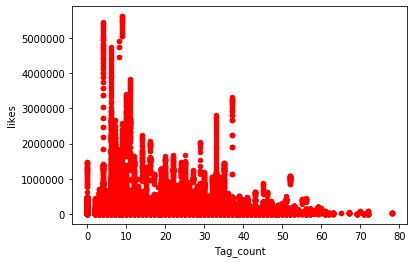

In [485]:
df.plot(kind='scatter',x='Tag_count',y='likes',color='red') #between tag count and time to trend
plt.show()

#### Heatmap of correlations between quantitative variables

As can be seen in the heatmap below, the correlation coefficient between views and likes is 0.8, which means there's a strong relationship between the two. This makes sense as we would expect people to watch videos that are widely liked and people to watch and re-watch the videos they like. There are also strong relationships between comment counts and likes, and comments counts and dislikes, which is also expected.

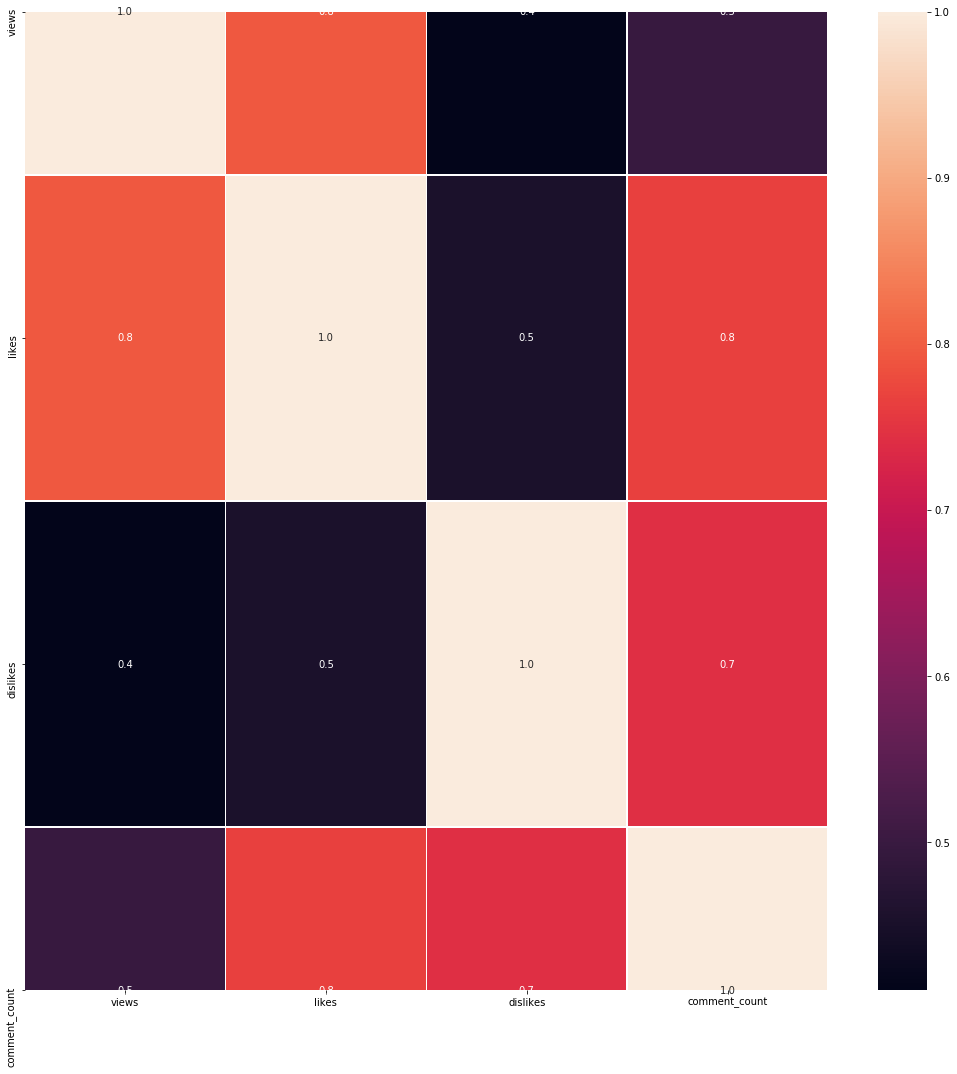

In [28]:
#create a heat map of correlations between variables to identify any quantitative relationships

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()